<a href="https://colab.research.google.com/github/Anamika-sasankan/assignment-on-pandas/blob/main/Regression_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
df=pd.read_csv("/content/car_age_price.csv")

In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


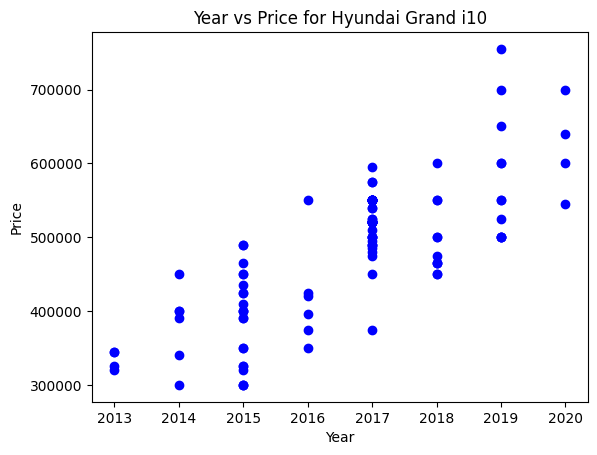

In [13]:
X=df[["Year"]].values
Y=df["Price"]
plt.scatter(X, Y, color='blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price for Hyundai Grand i10')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Lasso Regression Model

In [20]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [21]:
print("Linear Regression Metrics:")
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("\nLasso Regression Metrics:")
print("R-squared:", r2_score(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))


Linear Regression Metrics:
R-squared: 0.36759313425902185
Mean Squared Error: 4326906256.829671

Lasso Regression Metrics:
R-squared: 0.36759381368868127
Mean Squared Error: 4326901608.19506


In [22]:
year_2022 = np.array([[2022]])
price_2022_lr = lr_model.predict(year_2022)
price_2022_lasso = lasso_model.predict(scaler.transform(year_2022))
print(f"Predicted Price for 2022 Model (Linear Regression): {price_2022_lr[0]:.2f}")
print(f"Predicted Price for 2022 Model (Lasso Regression): {price_2022_lasso[0]:.2f}")


Predicted Price of a 2022 Model:
Linear Regression: 743601.6159450412
Lasso Regression: 743601.3917776793


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


 # Compare the performance of the models

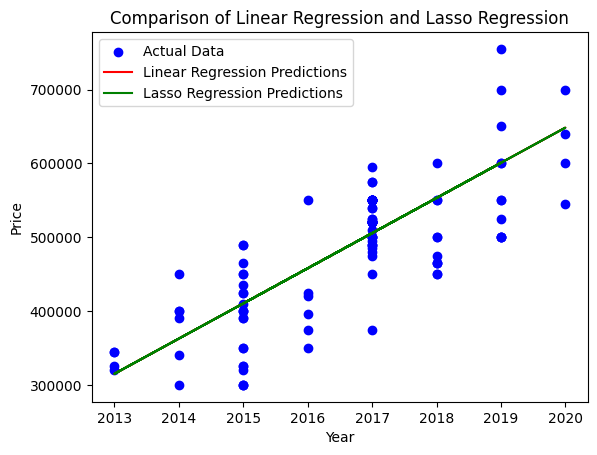

In [24]:
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lr, color='red', label='Linear Regression Predictions')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression Predictions')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Comparison of Linear Regression and Lasso Regression')
plt.legend()
plt.show()